In [43]:
!adb devices && adb forward tcp:9999 tcp:1418

List of devices attached
HA0NSBDN	device



In [53]:
import android
droid = android.Android()
droid.ttsSpeak("Estoy listo para recibir instrucciones")

Result(id=0, result=None, error=None)

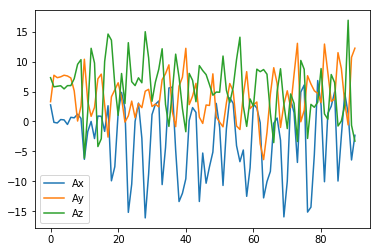

In [52]:
import pandas as pd
import time
%matplotlib inline

def capturaDatosAceleracion(tiempoTotal):
    """
            Una funcion simple que registra lecturas del acelerometro y las
            guarda en un DataFrame de pandas
    """
    aceleracion = []
    tiempoCensado = 0
    tiempoTotal2 = tiempoTotal
    
    droid.startSensingTimed(2,100)
    
    while tiempoCensado <= tiempoTotal2:
        aceleracion.append(droid.sensorsReadAccelerometer().result)
        time.sleep(100/1000.00)
        tiempoCensado += 100
    droid.stopSensing();
    return pd.DataFrame(aceleracion, columns=["Ax","Ay","Az"])

vals=["3 seg","5 seg","Otro"]
droid.dialogCreateAlert("Selecciona Tiempo a censar")
droid.dialogSetSingleChoiceItems(vals)
droid.dialogSetPositiveButtonText('Selecciona')
droid.dialogShow()
droid.dialogGetResponse()
res = droid.dialogGetSelectedItems()

if res.result[0] == 0:
    tiempoTotal = 3000
    acel = capturaDatosAceleracion(tiempoTotal)
    acel.plot()
if res.result[0] == 1:
    tiempoTotal = 5000
    acel = capturaDatosAceleracion(tiempoTotal)
    acel.plot()
if res.result[0] == 2: 
    droid.dialogGetInput("Tiempo a censar","Ingresa los segundos","")
    tiempousuario = droid.dialogGetResponse().result
    tiempoTotal = int(tiempousuario["value"])*1000
    acel = capturaDatosAceleracion(tiempoTotal)
    acel.plot()

In [49]:
droid.stopSensing();